# Titanic

![Titanic](https://th.bing.com/th/id/R.fe83e2bdd475045a079ff2fd819e0c6a?rik=qoEi3UMpxZvT7Q&riu=http%3a%2f%2fcdn.thinglink.me%2fapi%2fimage%2f1035116204735332353%2f1024%2f10%2fscaletowidth%2f0%2f0%2f1%2f1%2ffalse%2ftrue%3fwait%3dtrue&ehk=XLxQ1bPM%2b9%2bsxMTY879WlMxYGRgXiMPXbr911rK4AEk%3d&risl=&pid=ImgRaw&r=0)

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [311]:
titanic = pd.read_csv("datasets/titanic.csv")

In [312]:
type(titanic)

pandas.core.frame.DataFrame

In [313]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [314]:
df = titanic.copy()

In [315]:
## 중복치

df.duplicated().sum()

0

In [316]:
## 결측치

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

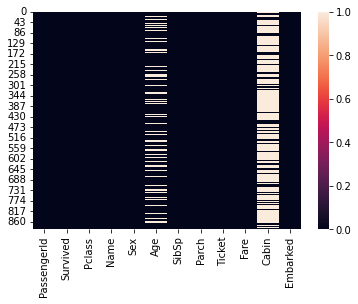

In [317]:
sns.heatmap(df.isna())

In [318]:
#!pip install missingno
# 결측치 찾아주는 패키지

In [319]:
import missingno as msno

<AxesSubplot:>

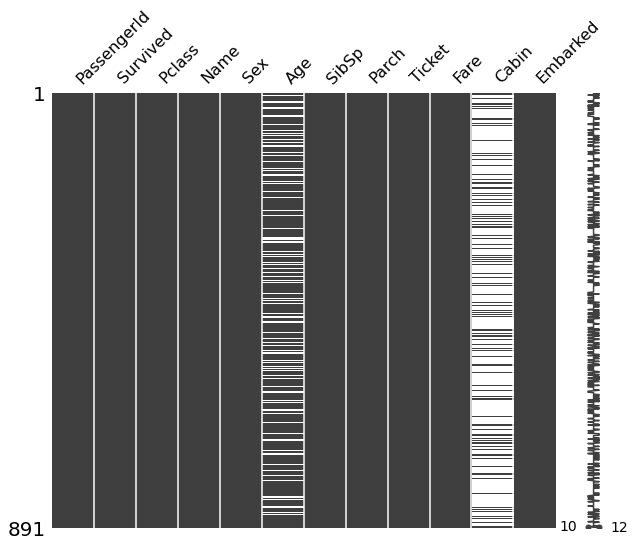

In [320]:
msno.matrix(df, figsize = (10, 8))

In [321]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [322]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,lost,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,saved,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,saved,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,saved,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,lost,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

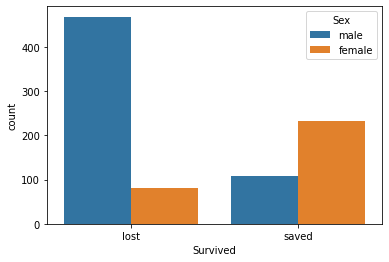

In [323]:
sns.countplot(data = df, x = 'Survived', hue = 'Sex')

In [324]:
df['Survived'].value_counts()

lost     549
saved    342
Name: Survived, dtype: int64

In [325]:
## 생존율 및 사망률

df['Survived'].value_counts()/df.shape[0]

lost     0.616162
saved    0.383838
Name: Survived, dtype: float64

In [326]:
## 성별에 대해서 countplot, 숫자값, 비율

<AxesSubplot:xlabel='Sex', ylabel='count'>

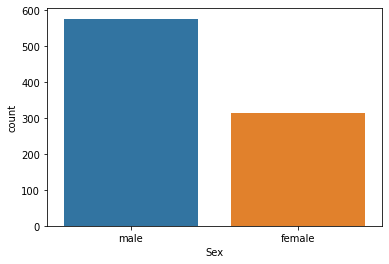

In [327]:
sns.countplot(data = df, x = 'Sex')

In [328]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [329]:
df['Sex'].value_counts()/df.shape[0]

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [330]:
## 성별에 따른 생존자 수

<AxesSubplot:xlabel='Sex', ylabel='count'>

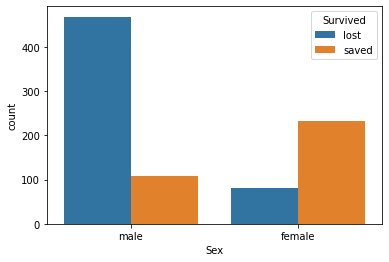

In [331]:
sns.countplot(data = df, x = 'Sex', hue = 'Survived')

In [332]:
df["Survived"] = df["Survived"].map({"saved":1, "lost":0})

df.groupby('Sex').Survived.sum()
#Survived의 값을 인코딩하여 값을 구한 경우

Sex
female    233
male      109
Name: Survived, dtype: int64

In [333]:
df.groupby(['Sex', 'Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

In [334]:
df.groupby(['Sex', 'Survived']).count()['PassengerId']
#Survived의 값을 인코딩하지 않고도 값을 구하는 방법

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

In [335]:
## 객실 등급에 따른 생존자

In [336]:
df.groupby(['Pclass', 'Survived']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1st    0                  80    80   80   64     80     80      80    80   
       1                 136   136  136  122    136    136     136   136   
2nd    0                  97    97   97   90     97     97      97    97   
       1                  87    87   87   83     87     87      87    87   
3rd    0                 372   372  372  270    372    372     372   372   
       1                 119   119  119   85    119    119     119   119   

                 Cabin  Embarked  
Pclass Survived                   
1st    0            59        80  
       1           117       134  
2nd    0             3        97  
       1            13        87  
3rd    0             6       372  
       1             6       119

In [337]:
df.groupby(['Pclass', 'Survived']).count()['PassengerId']

Pclass  Survived
1st     0            80
        1           136
2nd     0            97
        1            87
3rd     0           372
        1           119
Name: PassengerId, dtype: int64

In [338]:
type(df.groupby(['Pclass', 'Survived']).count())

pandas.core.frame.DataFrame

In [339]:
df.groupby('Pclass').Survived.sum()

Pclass
1st    136
2nd     87
3rd    119
Name: Survived, dtype: int64

In [340]:
type(df.groupby('Pclass').Survived.sum())

pandas.core.series.Series

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

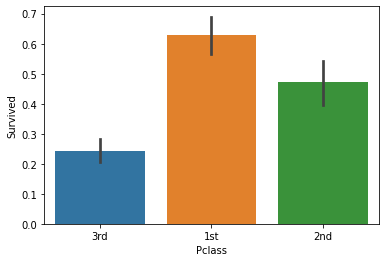

In [341]:
sns.barplot(data = df, x = 'Pclass', y = 'Survived')

In [342]:
##객실과 성별에 따른 생존자

In [343]:
df.groupby(['Pclass', 'Sex', 'Survived']).count()

PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  \
Pclass Sex    Survived                                                       
1st    female 0                   3     3    3      3      3       3     3   
              1                  91    91   82     91     91      91    91   
       male   0                  77    77   61     77     77      77    77   
              1                  45    45   40     45     45      45    45   
2nd    female 0                   6     6    6      6      6       6     6   
              1                  70    70   68     70     70      70    70   
       male   0                  91    91   84     91     91      91    91   
              1                  17    17   15     17     17      17    17   
3rd    female 0                  72    72   55     72     72      72    72   
              1                  72    72   47     72     72      72    72   
       male   0                 300   300  215    300    300     300   300   
              1                  47    47   38     47     47      47    47   

                        Cabin  Embarked  
Pclass Sex    Survived                   
1st    female 0             3         3  
              1            78        89  
       male   0            56        77  
              1            39        45  
2nd    female 0             1         6  
              1             9        70  
       male   0             2        91  
              1             4        17  
3rd    female 0             2        72  
              1             4        72  
       male   0             4       300  
              1             2        47

In [344]:
df.groupby(['Pclass', 'Sex', 'Survived']).count()['PassengerId']

Pclass  Sex     Survived
1st     female  0             3
                1            91
        male    0            77
                1            45
2nd     female  0             6
                1            70
        male    0            91
                1            17
3rd     female  0            72
                1            72
        male    0           300
                1            47
Name: PassengerId, dtype: int64

In [345]:
df.groupby(['Sex', 'Pclass']).Survived.sum()

Sex     Pclass
female  1st       91
        2nd       70
        3rd       72
male    1st       45
        2nd       17
        3rd       47
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

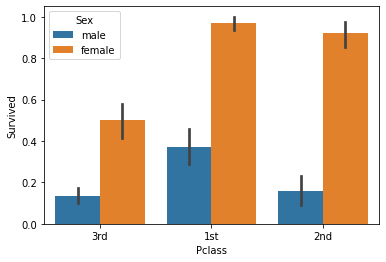

In [346]:
sns.barplot(data = df, x = 'Pclass', y = 'Survived', hue = 'Sex')

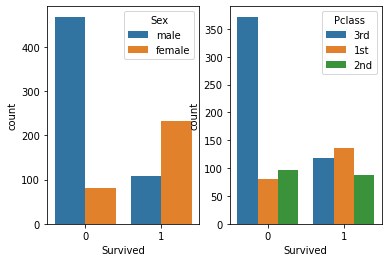

In [347]:
fig, axes = plt.subplots(1,2)
sns.countplot(x = 'Survived', hue = 'Sex', data = df, ax = axes[0])
sns.countplot(x = 'Survived', hue = 'Pclass', data = df, ax = axes[1])
plt.show()

In [348]:
##탑승 항구별 생존자

In [349]:
df.groupby(['Embarked', 'Survived']).count()

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Embarked Survived                                                              
C        0                  75      75    75   75   51     75     75      75   
         1                  93      93    93   93   79     93     93      93   
Q        0                  47      47    47   47   20     47     47      47   
         1                  30      30    30   30    8     30     30      30   
S        0                 427     427   427  427  353    427    427     427   
         1                 217     217   217  217  201    217    217     217   

                   Fare  Cabin  
Embarked Survived               
C        0           75     17  
         1           93     52  
Q        0           47      2  
         1           30      2  
S        0          427     49  
         1          217     80

In [350]:
df.groupby('Embarked').Survived.sum()

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

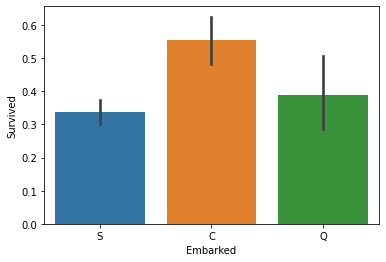

In [351]:
sns.barplot(data = df, x = 'Embarked', y = 'Survived')

In [352]:
## cabin column 없애기

In [353]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [354]:
df = df.drop(['PassengerId', 'Cabin', 'Ticket'], axis = 1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3rd,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [355]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [356]:
## survive 생존 1, 사망 0
## pclass 1st 0, 2nd 1, 3rd 2
## sex male 0, female 1
## embarked C 0, Q 1, S 2  으로 인코딩하기

In [357]:
df['Pclass'] = df['Pclass'].map({'1st':0, '2nd':1, '3rd':2})

In [358]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,2,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,2,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [359]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [360]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0
1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0
2,1,2,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0
3,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2.0
4,0,2,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2.0


In [361]:
df['Embarked'].dtype

dtype('float64')

In [362]:
## Embarked의 결측치를 가장 많은 것으로 채우기

df['Embarked'] = df['Embarked'].fillna(2)

In [363]:
df.isna().sum(axis=0)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [364]:
## age 결측치 해결

df[df['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,2,"Moran, Mr. James",0,NaN,0,0,8.4583,1.0
17,1,1,"Williams, Mr. Charles Eugene",0,NaN,0,0,13.0000,2.0
19,1,2,"Masselmani, Mrs. Fatima",1,NaN,0,0,7.2250,0.0
26,0,2,"Emir, Mr. Farred Chehab",0,NaN,0,0,7.2250,0.0
28,1,2,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,7.8792,1.0
...,...,...,...,...,...,...,...,...,...
859,0,2,"Razi, Mr. Raihed",0,NaN,0,0,7.2292,0.0
863,0,2,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,69.5500,2.0
868,0,2,"van Melkebeke, Mr. Philemon",0,NaN,0,0,9.5000,2.0
878,0,2,"Laleff, Mr. Kristo",0,NaN,0,0,7.8958,2.0


In [365]:
# 호칭을 통해 나이 유추하기 위해 애매한 호칭을 바꾸기
df.Name.str.extract("([A-Za-z]+)\.")

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [366]:
df['Initial'] = df.Name.str.extract("([A-Za-z]+)\.")
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,2,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0,Mr
1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0,Mrs
2,1,2,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0,Miss
3,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2.0,Mrs
4,0,2,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2.0,Mr
5,0,2,"Moran, Mr. James",0,NaN,0,0,8.4583,1.0,Mr
6,0,0,"McCarthy, Mr. Timothy J",0,54.0,0,0,51.8625,2.0,Mr
7,0,2,"Palsson, Master. Gosta Leonard",0,2.0,3,1,21.0750,2.0,Master
8,1,2,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,11.1333,2.0,Mrs
9,1,1,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,30.0708,0.0,Mrs


In [367]:
df['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [368]:
be = ['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don']
ae = ['Miss', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr']

In [369]:
df['Initial'] = df['Initial'].replace(be,ae)
df['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [370]:
##호칭별 나이 평균

am = round(df.groupby('Initial')['Age'].mean(),1)
am

Initial
Master     4.6
Miss      21.8
Mr        32.7
Mrs       35.9
Other     45.9
Name: Age, dtype: float64

In [371]:
type(am)

pandas.core.series.Series

In [372]:
am['Master']

4.6

In [373]:
df.loc[(df["Initial"]=='Mr') & (df["Age"].isna()==1),:] 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
5,0,2,"Moran, Mr. James",0,NaN,0,0,8.4583,1.0,Mr
17,1,1,"Williams, Mr. Charles Eugene",0,NaN,0,0,13.0000,2.0,Mr
26,0,2,"Emir, Mr. Farred Chehab",0,NaN,0,0,7.2250,0.0,Mr
29,0,2,"Todoroff, Mr. Lalio",0,NaN,0,0,7.8958,2.0,Mr
36,1,2,"Mamee, Mr. Hanna",0,NaN,0,0,7.2292,0.0,Mr
...,...,...,...,...,...,...,...,...,...,...
839,1,0,"Marechal, Mr. Pierre",0,NaN,0,0,29.7000,0.0,Mr
846,0,2,"Sage, Mr. Douglas Bullen",0,NaN,8,2,69.5500,2.0,Mr
859,0,2,"Razi, Mr. Raihed",0,NaN,0,0,7.2292,0.0,Mr
868,0,2,"van Melkebeke, Mr. Philemon",0,NaN,0,0,9.5000,2.0,Mr


In [374]:
## 각 호칭에 Age가 비어있는 곳에 각 호칭의 평균 나이 넣어주기
df.loc[(df.Initial=='Mr') & (df.Age.isna()),'Age'] = am['Mr']
df.loc[(df.Initial=='Master') & (df.Age.isna()),'Age'] = am['Master']
df.loc[(df.Initial=='Miss') & (df.Age.isna()),'Age'] = am['Miss']
df.loc[(df.Initial=='Mrs') & (df.Age.isna()),'Age'] = am['Mrs']
df.loc[(df.Initial=='Other') & (df.Age.isna()),'Age'] = am['Other']

In [375]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Initial     0
dtype: int64

In [147]:
## One-Hot Encoding

#df = pd.get_dummies(df, columns = ["Embarked"])

In [376]:
x = pd.get_dummies(df["Embarked"])
x.columns = ['C', 'Q', 'S']
df = pd.concat([df,x], axis =1)

In [377]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,C,Q,S
0,0,2,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0,Mr,0,0,1
1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0,Mrs,1,0,0
2,1,2,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0,Miss,0,0,1
3,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2.0,Mrs,0,0,1
4,0,2,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2.0,Mr,0,0,1


In [378]:
df = df.drop(['Name'], axis =1)

In [379]:
df = df.drop(['Initial'], axis =1)

In [380]:
df.sum()

Survived      342.0000
Pclass       1166.0000
Sex           314.0000
Age         26542.6700
SibSp         466.0000
Parch         340.0000
Fare        28693.9493
Embarked     1369.0000
C             168.0000
Q              77.0000
S             646.0000
dtype: float64

In [381]:
df.rename(columns = {'Embarked_0.0':'C', 'Embarked_1.0':'Q', 'Embarked_2.0':'S' }, inplace = True)

In [382]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,2,0,22.0,1,0,7.2500,2.0,0,0,1
1,1,0,1,38.0,1,0,71.2833,0.0,1,0,0
2,1,2,1,26.0,0,0,7.9250,2.0,0,0,1
3,1,0,1,35.0,1,0,53.1000,2.0,0,0,1
4,0,2,0,35.0,0,0,8.0500,2.0,0,0,1


In [155]:
## 저장하기

xarr = df.to_numpy()

In [156]:
np.savez('MyTitanic.npz', x=xarr)

In [157]:
k = np.load('MyTitanic.npz')

In [158]:
k['x']

array([[ 0.    ,  2.    ,  0.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  0.    ,  1.    , ...,  0.    , 71.2833,  0.    ],
       [ 1.    ,  2.    ,  1.    , ...,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 0.    ,  2.    ,  1.    , ...,  2.    , 23.45  ,  2.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.    , 30.    ,  0.    ],
       [ 0.    ,  2.    ,  0.    , ...,  0.    ,  7.75  ,  1.    ]])

## 머신러닝 알고리즘

In [159]:
## train_data와 test_data를 나누기 --> 최대한 일반화하고 과적합을 막기 위해...
## 교차검증 - 최대한 적합한 모델을 선택하기 위한 방벙(과적합을 피하고 최대한 일반화하기 위한 노력...)
## 검증데이터는 학습과정에 사용 됨.(테스트 데이터와의 차이점)

In [383]:
df_x = df.iloc[:, 1:]

In [384]:
df_y = df.iloc[:, 0]

df_y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [407]:
## Support Vector Machine - default

In [394]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.3, random_state = 2022, stratify = df_y)

from sklearn import svm

svm = svm.SVC(kernel = 'linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [395]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(x_test)
accuracy_score(y_test, y_pred)

0.7723880597014925

In [410]:
## Support Vector Machine - gridsearch

In [414]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param = {
    'C' : range(1, 100),
    'gamma' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
    'kernel' : ['rbf']
}

In [416]:
model = svm.SVC(kernel = 'rbf')

In [418]:
grid = GridSearchCV(model, param, refit = True)
grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 100),
                         'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                   50, 100],
                         'kernel': ['rbf']})

In [419]:
y_pred = grid.best_estimator_.predict(x_test)
accuracy_score(y_test, y_pred)

0.7985074626865671

In [408]:
## Decision Tree

In [401]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [403]:
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)

0.7835820895522388

In [409]:
## Random Forest

In [405]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [406]:
y_pred = rfc.predict(x_test)
accuracy_score(y_test, y_pred)

0.8097014925373134